# Importing Essential Libraries

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset

In [79]:
data = pd.read_csv('full_filled_stroke_data (1).csv')

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked,1
1,Female,59.0,0,0,Yes,Private,Rural,76.15,30.242937,Unknown,1
2,Male,78.0,0,1,Yes,Private,Urban,219.84,30.698951,Unknown,1
3,Male,57.0,0,1,No,Govt_job,Urban,217.08,33.808410,Unknown,1
4,Male,58.0,0,0,Yes,Private,Rural,189.84,31.378534,Unknown,1


# Exploratory Data Analysis

In [80]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Data is clean..!**
**Let's see the data types of the columns and their values**

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             201 non-null    object 
 1   age                201 non-null    float64
 2   hypertension       201 non-null    int64  
 3   heart_disease      201 non-null    int64  
 4   ever_married       201 non-null    object 
 5   work_type          201 non-null    object 
 6   Residence_type     201 non-null    object 
 7   avg_glucose_level  201 non-null    float64
 8   bmi                201 non-null    float64
 9   smoking_status     201 non-null    object 
 10  stroke             201 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 17.4+ KB


In [82]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,52.049154,0.233831,0.164179,126.724627,29.336870,0.199005
std,22.276181,0.424323,0.371363,59.240322,3.363098,0.400249
min,0.480000,0.000000,0.000000,57.520000,17.899295,0.000000
25%,37.000000,0.000000,0.000000,81.430000,28.397893,0.000000
50%,58.000000,0.000000,0.000000,99.870000,29.948147,0.000000
75%,71.000000,0.000000,0.000000,191.790000,31.378534,0.000000
max,82.000000,1.000000,1.000000,260.850000,35.188605,1.000000


/var/folders/qw/9jnjbypn6db4fj009y9vrrz80000gn/T/ipykernel_72164/1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot:>

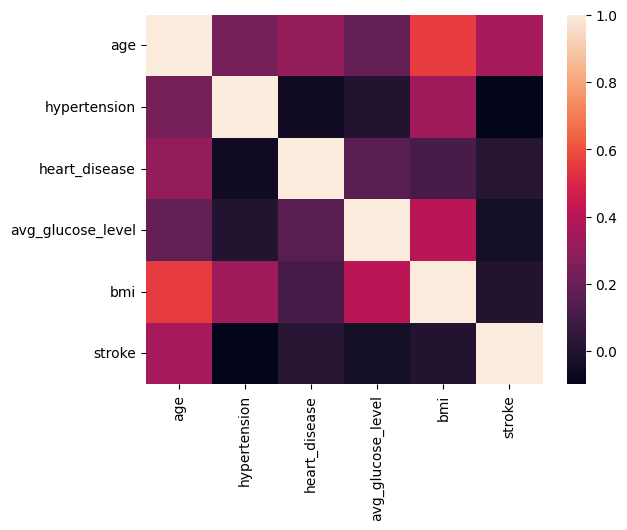

In [83]:
sns.heatmap(data.corr())

<AxesSubplot:>

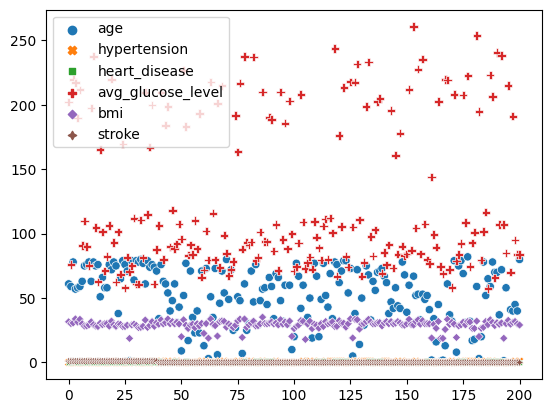

In [84]:


sns.scatterplot(data = data)



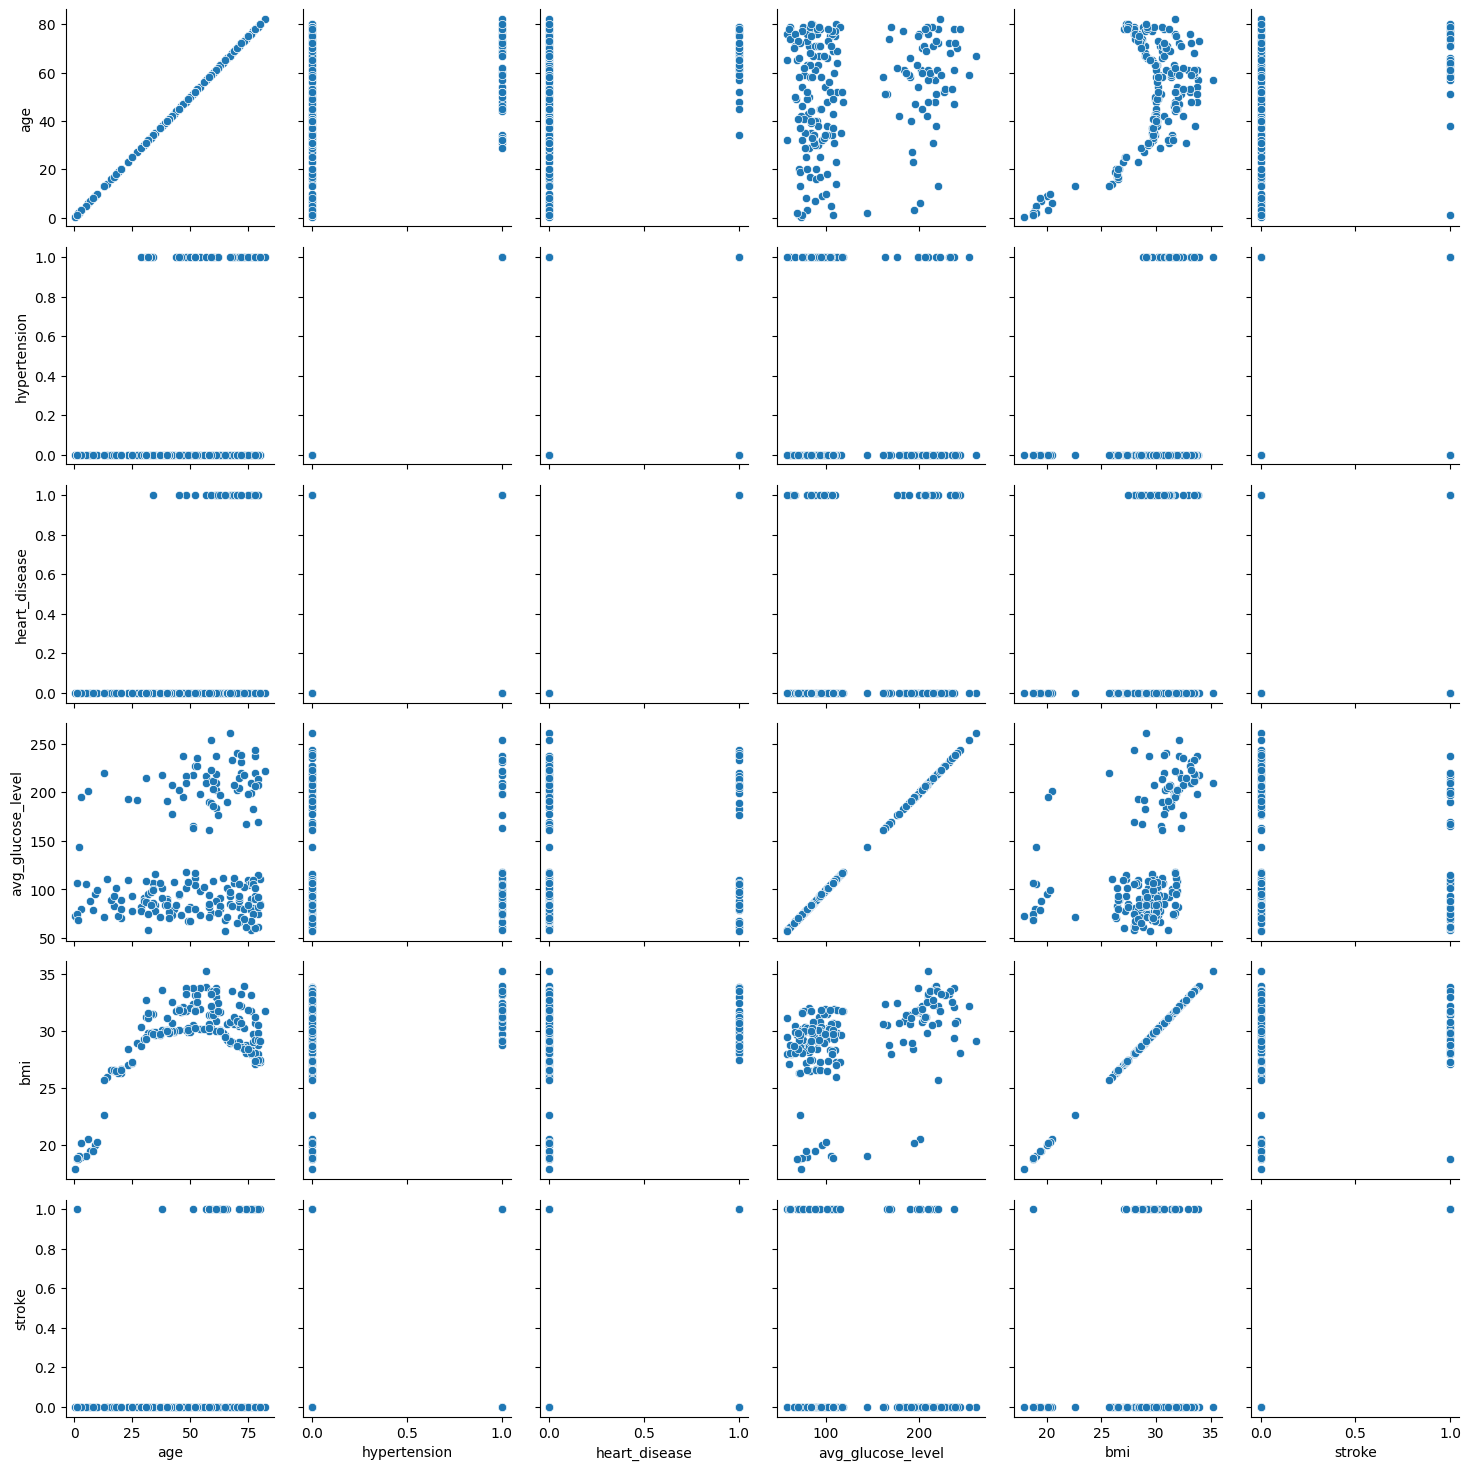

In [85]:
g= sns.PairGrid(data)
g.map(sns.scatterplot);

## Label Encoding 

In [86]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()

In [87]:
data['gender']=l1.fit_transform(data['gender'])
data['ever_married']=l1.fit_transform(data['ever_married'])
data['work_type']=l1.fit_transform(data['work_type'])
data['Residence_type']=l1.fit_transform(data['Residence_type'])
data['smoking_status']=l1.fit_transform(data['smoking_status'])

In [88]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,61.0,0,0,1,2,0,202.21,31.555602,2,1
1,0,59.0,0,0,1,1,0,76.15,30.242937,0,1
2,1,78.0,0,1,1,1,1,219.84,30.698951,0,1
3,1,57.0,0,1,0,0,1,217.08,33.808410,0,1
4,1,58.0,0,0,1,1,0,189.84,31.378534,0,1
...,...,...,...,...,...,...,...,...,...,...,...
196,1,41.0,0,0,0,1,0,70.15,29.756631,1,0
197,1,40.0,0,0,1,1,1,191.15,31.124172,3,0
198,0,45.0,1,0,1,0,0,95.02,31.798304,3,0
199,1,40.0,0,0,1,1,0,83.94,29.951301,3,0


# Index slicing

In [89]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# spliting the dataset into train and test set

In [90]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# feature scaling

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

# Training the model through k-NN algorithm

In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski' , p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Prediction

In [93]:
y_pred = classifier.predict(X_test)
y_pred 

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)*100

83.60655737704919